In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
movies = pd.read_csv('/content/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
genres = movies[['genres']]
genres.head()

,genres
0,Adventure|Animation|Children|Comedy|Fantasy
1,Adventure|Children|Fantasy
2,Comedy|Romance
3,Comedy|Drama|Romance
4,Comedy


In [ ]:
movies.genres.value_counts()

genres
Drama                                   9056
Comedy                                  5674
(no genres listed)                      5062
Documentary                             4731
Comedy|Drama                            2386
                                        ... 
Action|Adventure|Crime|Fantasy             1
Drama|Film-Noir|Musical|Thriller           1
Action|Drama|Horror|Mystery                1
Adventure|Comedy|Sci-Fi|Thriller|War       1
Comedy|Horror|Mystery|Sci-Fi|Western       1
Name: count, Length: 1639, dtype: int64

In [ ]:
genres = genres['genres'].str.split('|', expand=True)
genres.head()

,0,1,2,3,4,5,6,7,8,9
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,Comedy,Romance,None,None,None,None,None,None,None,None
3,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,Comedy,None,None,None,None,None,None,None,None,None


In [ ]:
unique_genres = []
for i in range(10):
  vals = genres[i].unique()
  for j in vals:
    if j not in unique_genres:
      unique_genres.append(j)
unique_genres.remove('(no genres listed)')
unique_genres.remove(None)
len(unique_genres)

19

In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
genres_classified = movies[['genres']]
genres_classified.head()

,genres
0,Adventure|Animation|Children|Comedy|Fantasy
1,Adventure|Children|Fantasy
2,Comedy|Romance
3,Comedy|Drama|Romance
4,Comedy


In [ ]:
genres_new = movies[['genres']]
genres_new.head()

,genres
0,Adventure|Animation|Children|Comedy|Fantasy
1,Adventure|Children|Fantasy
2,Comedy|Romance
3,Comedy|Drama|Romance
4,Comedy


In [ ]:
for i in unique_genres:
  genres_new[i] = 0
genres_new.head()

<ipython-input-51-f469ee3ac654>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genres_new[i] = 0


,genres,Adventure,Comedy,Action,Drama,Crime,Children,Mystery,Documentary,Animation,Thriller,Horror,Fantasy,Western,Film-Noir,Romance,War,Sci-Fi,Musical,IMAX
0,Adventure|Animation|Children|Comedy|Fantasy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Adventure|Children|Fantasy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Comedy|Romance,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Comedy|Drama|Romance,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Comedy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
len(genres_classified['genres'])

62423

In [ ]:
for i in unique_genres:
  for j in range(len(genres_classified['genres'])):
    if i in genres_classified.loc[j,'genres']:
      genres_new.at[j,i] = 1
genres_new.head()

,genres,Adventure,Comedy,Action,Drama,Crime,Children,Mystery,Documentary,Animation,Thriller,Horror,Fantasy,Western,Film-Noir,Romance,War,Sci-Fi,Musical,IMAX
0,Adventure|Animation|Children|Comedy|Fantasy,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0
1,Adventure|Children|Fantasy,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,Comedy|Romance,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,Comedy|Drama|Romance,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,Comedy,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
genres_new.columns.value_counts().sum()

20

In [ ]:
genres_new = genres_new.drop('genres', axis=1)
genres_new.head()

,Adventure,Comedy,Action,Drama,Crime,Children,Mystery,Documentary,Animation,Thriller,Horror,Fantasy,Western,Film-Noir,Romance,War,Sci-Fi,Musical,IMAX
0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
movies = pd.concat([movies, genres_new], axis=1)
movies.head()

,movieId,title,genres,Adventure,Comedy,Action,Drama,Crime,Children,Mystery,...,Thriller,Horror,Fantasy,Western,Film-Noir,Romance,War,Sci-Fi,Musical,IMAX
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
movies = movies.drop(['genres','title'], axis=1)
movies.tail()

,movieId,Adventure,Comedy,Action,Drama,Crime,Children,Mystery,Documentary,Animation,Thriller,Horror,Fantasy,Western,Film-Noir,Romance,War,Sci-Fi,Musical,IMAX
62418,209157,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
62419,209159,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
62420,209163,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
62421,209169,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
62422,209171,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
ratings = pd.read_csv('/content/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [ ]:
ratings.shape

(3854860, 4)

In [ ]:
t = ratings.userId.value_counts()

In [ ]:
t.sort_index()

userId
1         70
2        184
3        656
4        242
5        101
        ... 
25384     25
25385     74
25386     49
25387    108
25388    275
Name: count, Length: 25388, dtype: int64

In [ ]:
sum(t.sort_index().head(10000))

1496612

In [ ]:
ratings_trial_1 = ratings.head(1496612)
ratings_trial_1.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [ ]:
train_data = pd.merge(ratings_trial_1, movies, on='movieId', how='left')
train_data.tail()

,userId,movieId,rating,timestamp,Adventure,Comedy,Action,Drama,Crime,Children,...,Thriller,Horror,Fantasy,Western,Film-Noir,Romance,War,Sci-Fi,Musical,IMAX
1496607,10000,117176,5.0,1539043478,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1496608,10000,118696,2.5,1539035406,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1496609,10000,145150,5.0,1539036026,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1496610,10000,157296,2.0,1539034792,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1496611,10000,179135,4.5,1539034355,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
movies.loc[878,:]

movieId        899
Adventure        0
Comedy           1
Action           0
Drama            0
Crime            0
Children         0
Mystery          0
Documentary      0
Animation        0
Thriller         0
Horror           0
Fantasy          0
Western          0
Film-Noir        0
Romance          1
War              0
Sci-Fi           0
Musical          1
IMAX             0
Name: 878, dtype: int64

In [ ]:
plotting_data = train_data[train_data['userId']>=0]
plotting_data.tail()

,userId,movieId,rating,timestamp,Adventure,Comedy,Action,Drama,Crime,Children,...,Thriller,Horror,Fantasy,Western,Film-Noir,Romance,War,Sci-Fi,Musical,IMAX
1496607,10000,117176,5.0,1539043478,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1496608,10000,118696,2.5,1539035406,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1496609,10000,145150,5.0,1539036026,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1496610,10000,157296,2.0,1539034792,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1496611,10000,179135,4.5,1539034355,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
plotting_data.columns

Index(['userId', 'movieId', 'rating', 'timestamp', 'Adventure', 'Comedy',
       'Action', 'Drama', 'Crime', 'Children', 'Mystery', 'Documentary',
       'Animation', 'Thriller', 'Horror', 'Fantasy', 'Western', 'Film-Noir',
       'Romance', 'War', 'Sci-Fi', 'Musical', 'IMAX'],
      dtype='object')

In [ ]:
sns.scatterplot(data=plotting_data[['Adventure', 'Comedy']])

<Axes: >

Error in callback <function _draw_all_if_interactive at 0x7dd437e13eb0> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7dd437e13130> (for post_execute):


KeyboardInterrupt: 

In [ ]:
sns.relplot(x=plotting_data['movieId'],y=plotting_data['rating'],hue=plotting_data['userId'])

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7dd437e13eb0> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7dd437e13130> (for post_execute):


KeyboardInterrupt: 

In [ ]:
sse = []
k_rng = range(1,40)
for k in k_rng:
  km = KMeans(n_clusters = k)
  km.fit(train_data)
  sse.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
sse

In [ ]:
plt.plot(range(10),sse[:10])

In [ ]:
train_data_new = train_data.drop(columns = ['movieId','timestamp'])

In [ ]:
km = KMeans(n_clusters = 2)
km.fit(train_data_new)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [ ]:
train_data['Cluster_Number'] = km.predict(train_data_new)

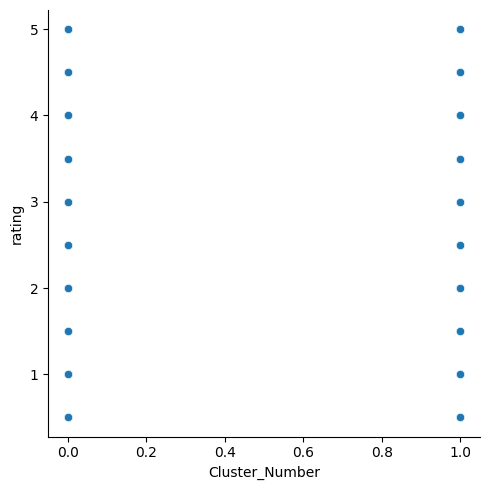

In [ ]:
sns.relplot(x=train_data['Cluster_Number'],y=train_data['rating'])

In [ ]:
train_data_new.corr()

,userId,rating,Adventure,Comedy,Action,Drama,Crime,Children,Mystery,Documentary,...,Horror,Fantasy,Western,Film-Noir,Romance,War,Sci-Fi,Musical,IMAX,Cluster_Number
userId,1.000000,0.004655,0.001141,-0.004941,-0.002244,0.004288,0.001690,0.001026,0.001863,0.000701,...,-0.002452,0.002730,0.000639,0.006194,-0.001988,0.000509,-0.000211,0.003013,0.002430,0.005181
rating,0.004655,1.000000,-0.011831,-0.078657,-0.044565,0.123318,0.064940,-0.030629,0.037888,0.019881,...,-0.067918,-0.008872,0.006595,0.035248,0.006375,0.056055,-0.025163,0.006595,0.011746,0.017149
Adventure,0.001141,-0.011831,1.000000,-0.062157,0.331908,-0.267881,-0.180736,0.236408,-0.099295,-0.056898,...,-0.119468,0.266495,0.030957,-0.043263,-0.147257,-0.050221,0.239929,0.012263,0.181431,0.053181
Comedy,-0.004941,-0.078657,-0.062157,1.000000,-0.225339,-0.259880,-0.079593,0.128761,-0.167309,-0.054478,...,-0.107098,0.062061,-0.030190,-0.070666,0.195108,-0.074256,-0.186763,0.056879,-0.118634,-0.060611
Action,-0.002244,-0.044565,0.331908,-0.225339,1.000000,-0.248759,0.097098,-0.141111,-0.055135,-0.066981,...,-0.050412,-0.026217,0.031428,-0.043542,-0.186669,0.062650,0.326852,-0.116502,0.154134,0.059981
Drama,0.004288,0.123318,-0.267881,-0.259880,-0.248759,1.000000,0.070145,-0.151099,0.011055,-0.079758,...,-0.139384,-0.147612,-0.005810,-0.008164,0.114183,0.181584,-0.206553,-0.055838,-0.074362,-0.000786
Crime,0.001690,0.064940,-0.180736,-0.079593,0.097098,0.070145,1.000000,-0.114792,0.132093,-0.046962,...,-0.052194,-0.125216,-0.048239,0.142497,-0.162508,-0.082002,-0.146324,-0.082714,-0.017778,0.022122
Children,0.001026,-0.030629,0.236408,0.128761,-0.141111,-0.151099,-0.114792,1.000000,-0.064443,-0.033000,...,-0.085921,0.306943,-0.032221,-0.030589,-0.042422,-0.068298,-0.071211,0.304640,0.070361,0.006828
Mystery,0.001863,0.037888,-0.099295,-0.167309,-0.055135,0.011055,0.132093,-0.064443,1.000000,-0.030845,...,0.101375,-0.028407,-0.030312,0.165269,-0.066404,-0.065451,0.012896,-0.057459,0.001501,0.028994
Documentary,0.000701,0.019881,-0.056898,-0.054478,-0.066981,-0.079758,-0.046962,-0.033000,-0.030845,1.000000,...,-0.028545,-0.039029,-0.015426,-0.010800,-0.051200,-0.007464,-0.049459,0.001449,-0.016808,0.015202


In [ ]:
train_data_new.groupby('rating').mean()

,userId,Adventure,Comedy,Action,Drama,Crime,Children,Mystery,Documentary,Animation,...,Horror,Fantasy,Western,Film-Noir,Romance,War,Sci-Fi,Musical,IMAX,Cluster_Number
rating,,,,,,,,,,,,,,,,,,,,,
0.5,5054.829730,0.266143,0.430210,0.335652,0.289454,0.113545,0.118526,0.057336,0.020914,0.076323,...,0.128725,0.140286,0.012125,0.005076,0.157158,0.030971,0.196024,0.037410,0.056396,0.660259
1.0,5163.487866,0.234369,0.434712,0.317907,0.298671,0.117130,0.111861,0.056060,0.009195,0.049251,...,0.122921,0.121771,0.017349,0.004077,0.162586,0.030513,0.190497,0.035935,0.029255,0.319143
1.5,5023.609147,0.265546,0.427590,0.358084,0.305760,0.128007,0.104606,0.063369,0.006464,0.059892,...,0.115407,0.135862,0.014237,0.004091,0.172026,0.029987,0.211954,0.033914,0.054778,0.611397
2.0,5039.792018,0.237014,0.416637,0.326291,0.341001,0.130003,0.096417,0.065001,0.005491,0.050913,...,0.105504,0.116088,0.018519,0.004890,0.177667,0.034727,0.193028,0.037232,0.032231,0.349089
2.5,5008.394277,0.256268,0.401749,0.340941,0.356224,0.139958,0.095110,0.071109,0.007919,0.065058,...,0.101798,0.127870,0.016380,0.004968,0.178308,0.035494,0.198181,0.032976,0.053525,0.611571
3.0,5031.185434,0.236513,0.390836,0.310817,0.398031,0.146726,0.095448,0.068455,0.008042,0.059900,...,0.078475,0.110785,0.021561,0.006553,0.192284,0.040215,0.168844,0.041680,0.034175,0.335723
3.5,5102.465239,0.242627,0.351950,0.312314,0.442694,0.169080,0.084790,0.082350,0.013726,0.072611,...,0.076827,0.117908,0.017447,0.008123,0.173179,0.046844,0.181169,0.035394,0.055058,0.624325
4.0,5058.292797,0.226628,0.341540,0.279943,0.475299,0.175314,0.082520,0.084257,0.013468,0.067225,...,0.064702,0.105922,0.020394,0.011519,0.186553,0.055914,0.160593,0.040274,0.039169,0.404228
4.5,5145.345607,0.233430,0.301710,0.282759,0.509753,0.204794,0.076306,0.100887,0.016631,0.078086,...,0.058983,0.118651,0.018479,0.013298,0.168376,0.063053,0.175580,0.033588,0.055415,0.633585


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


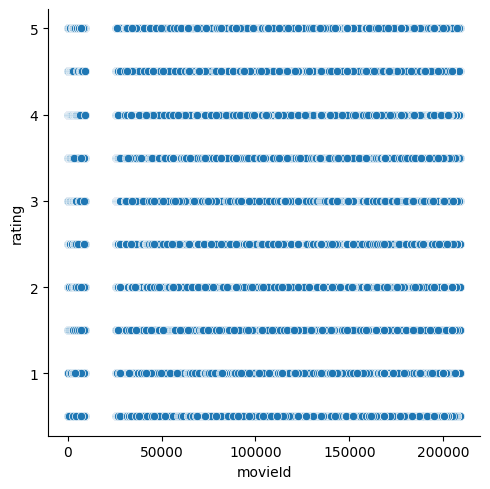

In [ ]:
km = KMeans(n_clusters = 2)
ratings = ratings.dropna()
km.fit(ratings)
ratings['Cluster_Number'] = km.predict(ratings)
sns.relplot(x=ratings['movieId'],y=ratings['rating'])

In [ ]:
sns.relplot(x=ratings['movieId'],y=ratings['rating'],hue = ratings['Cluster_Number'])